# PART 1 & 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("resource/reviews.csv")

if "ReviewText" not in df.columns:
    raise Exception("ReviewText not present in the dataframe")

df.isnull().sum().sort_values(ascending=False).head(10)
df["TextLength"] = df["ReviewText"].apply(lambda rt: len(rt))
df["WordCount"] = df["ReviewText"].apply(lambda rt: len(rt.split()))
df.head(10)


,ReviewText,TextLength,WordCount
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3
5,The product broke after one week.,33,6
6,Really happy with the performance.,34,5
7,Not worth the price.,20,4
8,Excellent build quality and fast delivery.,42,6
9,Disappointing experience overall.,33,3


# PART 3

In [3]:
import string
from collections import Counter

all_review = "".join(df["ReviewText"].tolist())
# print(all_review)

all_review = all_review.lower()
# print(all_review)

punctuation = string.punctuation
for p in punctuation:
    all_review = all_review.replace(p, "")

tokens = all_review.split()

# print(tokens[:50])
# print("Total tokens:", len(tokens))

word_freq = Counter(tokens)

print(word_freq.most_common(10))

[('the', 4), ('product', 2), ('and', 2), ('quality', 2), ('experience', 2), ('this', 1), ('is', 1), ('amazing', 1), ('very', 1), ('usefuli', 1)]


# PART 4

          Word  Frequency
9          the          4
4          and          2
1      product          2
10     quality          2
16  experience          2
2           is          1
0         this          1
6      usefuli          1
5         very          1
8         like          1


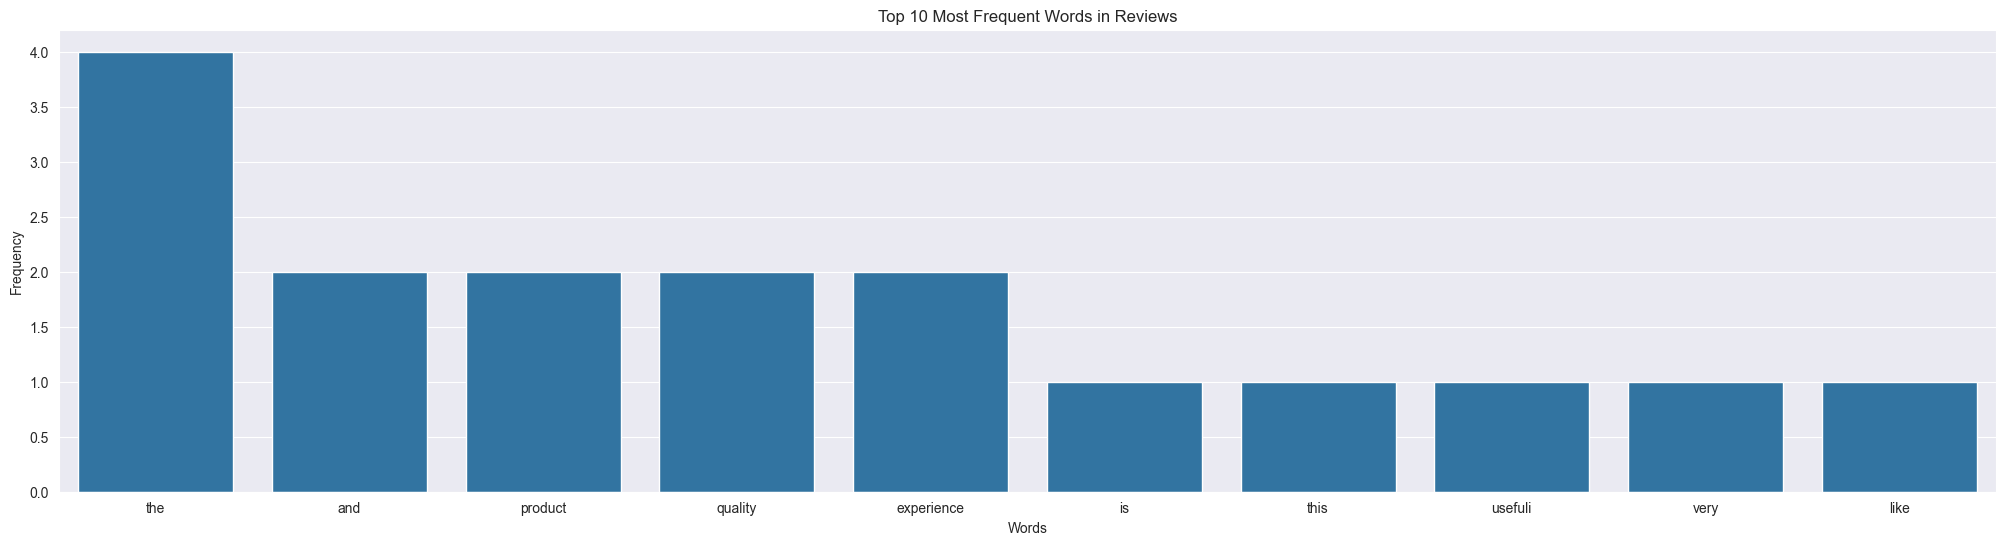

In [12]:
freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
freq_df = freq_df.sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(25, 6))
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
sns.barplot(y="Frequency", x="Word", data=freq_df[:10])
print(freq_df.head(10))


# PART 5

"کلمه THE و AND بیشترین تکرار را دارد که معنی خاصی ندارد ولی کلماتی مثل محصول
کیفیت و تجربه هم تکرار شدند که معنادار هستند."


"این کلمات بار معنایی مثبت یا منفی ندارند که بتوان از آن برداشتی کرد(مثل معیوب)"


"با حذف stopwords، کلمات خیلی کوتاه، عددها و واژه‌های بی‌معنی، متن رو تمیز می‌کنیم تا تحلیل دقیق‌تر و نتایج معتبرتری از داده‌ها بگیریم."
"مثل THE AND"